In [1]:
#!/usr/bin/python3

In [2]:
import csv
import datetime
from datetime import date
import dateutil.relativedelta
import calendar
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('Fintech_sheet.csv')
data.head()

,Title,Snippet,Link,Date,Source,Trend,Segment,Company,Country
0,"Reonomy raises $13 mln, led by Bain Capital Ve...","... High Peaks Venture Partners, KEC Ventures,...",https://www.pehub.com/2015/01/reonomy-raises-1...,2015-01-05,Thomson Reuters' peHUB (press release),Investments,Investment Advisory,"Reonomy,Bain Capital Ventures",US
1,Hong Kong P2P lending startup gets $20M fundin...,Hong Kong-based fintech startup WeLab announce...,https://www.techinasia.com/hong-kong-p2p-lendi...,2015-01-07,Tech in Asia,Investments,"Lending,Marketplace",WeLab,Hong Kong
2,Bitreserve Raises £6.3 Million Crowdfunding on...,Innovative bitcoin financial service company B...,http://www.crowdfundinsider.com/2015/01/60820-...,2015-01-09,Crowdfund Insider,Investments,Payment Processing,"Bitreserve,Uphold",US
3,Catax to expand with 3 new offices,"B&C Distributor interviewed Mark Tighe, Managi...",http://www.bridgingandcommercialdistributor.co...,2015-01-16,B&C Distributor,Expansion,Investment Advisory,Catax Solutions,US
4,UK-based Judo has raised GBP 6 million in inve...,Mobile payments platform Judo has raised £6m i...,http://techcitynews.com/2015/01/22/judo-grabs-...,2015-01-22,Tech City News,Investments,Payment Processing,"Route 66 Ventures,Judo",UK


In [4]:
data.shape

(518, 9)

# Checking activities by segments

In [5]:
ds = data.copy(deep=True)

In [6]:
ds.shape

(518, 9)

In [7]:
s = ds['Segment'].str.split(',').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'segments'
del ds['Segment']
df = ds.join(s)

In [8]:
df2 = (pd.DataFrame(df.groupby('segments').Title.nunique())).sort_values('Title', ascending=False )

In [9]:
df2

,Title
segments,
Payment Processing,135
Accelerators Incubators and Funds,104
Lending,82
B2B Fintech Services,59
Analytics and Management,56
Investment Advisory,45
Marketplace,41
Mobile Fintech,32


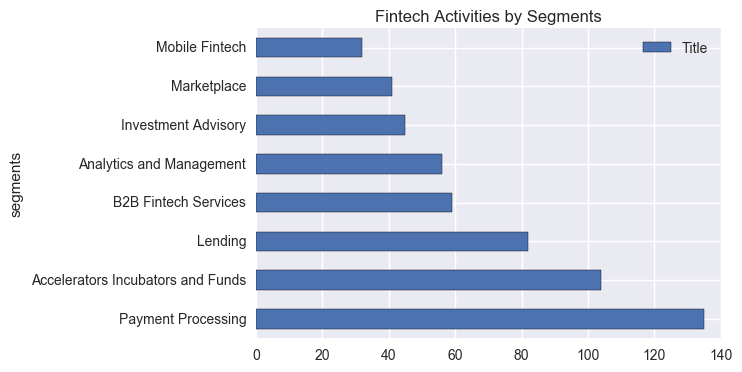

In [10]:
df2[['Title']].plot.barh(stacked=True, title = 'Fintech Activities by Segments');

# Filtering only investments, and then sorting by segments and geographies

## Filtering investments

In [11]:
d_inv = data.copy(deep=True)

In [12]:
d_inv.shape

(518, 9)

In [13]:
d_inv.columns

Index(['Title', 'Snippet', 'Link', 'Date', 'Source', 'Trend', 'Segment',
       'Company', 'Country'],
      dtype='object')

In [14]:
a = d_inv['Trend'].str.split(',').apply(Series, 1).stack()
a.index = a.index.droplevel(-1)
a.name = 'trend'
del d_inv['Trend']
df_inv2 = d_inv.join(a)



In [15]:
df_inv2.shape

(561, 9)

In [16]:
df_inv2.columns

Index(['Title', 'Snippet', 'Link', 'Date', 'Source', 'Segment', 'Company',
       'Country', 'trend'],
      dtype='object')

In [17]:
df_inv3 = df_inv2[df_inv2['trend'] == 'Investments']
df_inv3.shape

(263, 9)

## Sorting by segments

In [18]:
dfs = df_inv3.copy(deep=True)

In [19]:
b = dfs['Segment'].str.split(',').apply(Series, 1).stack()
b.index = b.index.droplevel(-1)
b.name = 'fintech_segment'
del dfs['Segment']
dfs2 = dfs.join(b)

In [20]:
dfs2.shape

(287, 9)

In [21]:
dfs3 = (pd.DataFrame(dfs2.groupby('fintech_segment').Title.nunique())).sort_values('Title', ascending=False )

In [22]:
dfs3

,Title
fintech_segment,
Payment Processing,69
Lending,53
B2B Fintech Services,41
Analytics and Management,36
Investment Advisory,29
Accelerators Incubators and Funds,27
Marketplace,23
Mobile Fintech,9


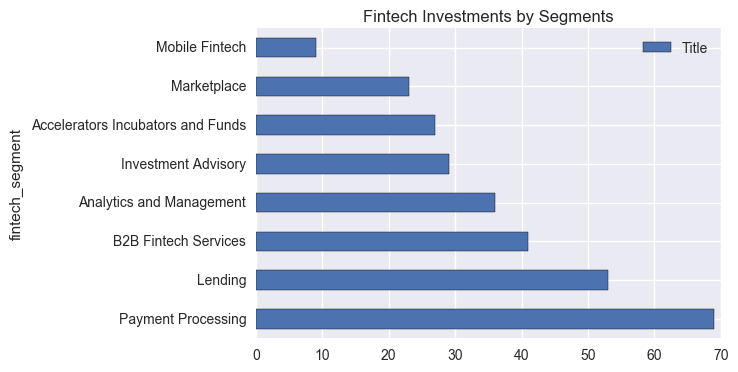

In [23]:
dfs3[['Title']].plot.barh(stacked=True, title = 'Fintech Investments by Segments');

## Sorting by geographies

In [24]:
dfg = df_inv3.copy(deep=True)

In [25]:
c = dfg['Country'].str.split(',').apply(Series, 1).stack()
c.index = c.index.droplevel(-1)
c.name = 'fintech_countries'
del dfg['Country']
dfg2 = dfg.join(c)

In [26]:
dfg3 = (pd.DataFrame(dfg2.groupby('fintech_countries').Title.nunique())).sort_values('Title', ascending=False )

In [27]:
dfg3

,Title
fintech_countries,
US,60
UK,54
India,28
Australia,25
Germany,13
Singapore,11
Canada,10
France,8
Ireland,6


In [28]:
dfg4 = dfg3.rename_axis('fintech_countries').rename_axis("countries", axis="columns" , inplace=True)

In [29]:
dfg4

countries,Title
fintech_countries,
US,60
UK,54
India,28
Australia,25
Germany,13
Singapore,11
Canada,10
France,8
Ireland,6


In [39]:
mask = dfg4['Title'] < 10

In [45]:
#mask

In [41]:
dfg5 = dfg4[~mask].copy()

In [42]:
dfg5.loc['Others', 'Title'] = dfg4.loc[mask, 'Title'].sum()
dfg5.Title = dfg5.Title.astype(int)

In [43]:
dfg5

countries,Title
fintech_countries,
US,60
UK,54
India,28
Australia,25
Germany,13
Singapore,11
Canada,10
Others,72


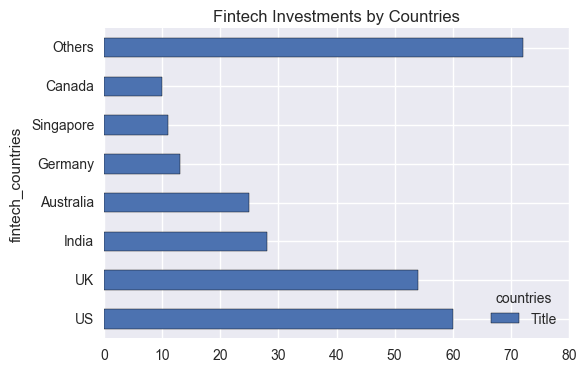

In [44]:
dfg5[['Title']].plot.barh(stacked=True, title = 'Fintech Investments by Countries');